# **DAB 103: Project #2**
# **Data Cleaning and Data Analysis of Dataset 'Major Crime Indicators'**

**Import the necessary libraries**

In [ ]:
!pip install researchpy
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Project Directory path 
project_dir ='/content/drive/MyDrive/Major_Crime_Indicators.csv'


In [ ]:
print(project_dir+'*')

/content/drive/MyDrive/Major_Crime_Indicators.csv*


**Load the dataset**

In [ ]:
df = pd.read_csv(project_dir)

In [ ]:
df

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8850397.689,5429358.510,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,3.0,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8818405.323,5436836.021,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,3.0,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8853790.925,5402070.833,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,3.0,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8832821.801,5419627.832,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,3.0,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8853452.390,5410706.417,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,3.0,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301228,-8844901.008,5433057.426,301113,GO-20221234233,D32,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,...,28.0,179.0,Tuesday,20,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,-8820394.722,5430802.804,301114,GO-20221234061,D43,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,28.0,179.0,Tuesday,21,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,-8825524.686,5429270.662,301115,GO-20221234664,D41,2022/05/20 04:00:00+00,2022/06/29 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2135,...,20.0,140.0,Friday,12,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,0.000,0.000,301116,GO-20221235156,D41,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,29.0,180.0,Wednesday,0,Auto Theft,NSA,NSA,0.000000,0.000000,301232


# **Exploratory Data Analysis**

In [ ]:
#Display the top  n (by default 5) rows of a DataFrame df
df.head()


,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8850397.689,5429358.510,201,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,1430,...,3.0,3.0,Friday,11,Assault,27,York University Heights,-79.504475,43.766371,1
1,-8818405.323,5436836.021,202,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2120,...,3.0,3.0,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861,2
2,-8853790.925,5402070.833,203,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,1430,...,3.0,3.0,Friday,13,Assault,19,Long Branch,-79.534957,43.589085,3
3,-8832821.801,5419627.832,204,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2130,...,3.0,3.0,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212,4
4,-8853452.390,5410706.417,205,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,1610,...,3.0,3.0,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247,5


In [ ]:
#Display the number of rows and columns of the DataFrame df
df.shape


(301233, 30)

In [ ]:
#Display the last  n (by default 5) rows of a DataFrame df
df.tail()

,X,Y,Index_,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,ucr_code,...,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
301228,-8844901.008,5433057.426,301113,GO-20221234233,D32,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,2135,...,28.0,179.0,Tuesday,20,Auto Theft,35,Westminster-Branson,-79.455098,43.790363,301229
301229,-8820394.722,5430802.804,301114,GO-20221234061,D43,2022/06/28 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,28.0,179.0,Tuesday,21,Auto Theft,137,Woburn,-79.234954,43.775740,301230
301230,-8825524.686,5429270.662,301115,GO-20221234664,D41,2022/05/20 04:00:00+00,2022/06/29 04:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,2135,...,20.0,140.0,Friday,12,Auto Theft,126,Dorset Park,-79.281037,43.765801,301231
301231,0.000,0.000,301116,GO-20221235156,D41,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,29.0,180.0,Wednesday,0,Auto Theft,NSA,NSA,0.000000,0.000000,301232
301232,-8854585.124,5426966.055,301117,GO-20221236298,D31,2022/06/29 04:00:00+00,2022/06/29 04:00:00+00,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,2135,...,29.0,180.0,Wednesday,16,Auto Theft,22,Humbermede,-79.542092,43.750849,301233


In [ ]:
#Display a list of all the column names in the DataFrame
df.columns

Index(['X', 'Y', 'Index_', 'event_unique_id', 'Division', 'occurrencedate',
       'reporteddate', 'location_type', 'premises_type', 'ucr_code', 'ucr_ext',
       'offence', 'reportedyear', 'reportedmonth', 'reportedday',
       'reporteddayofyear', 'reporteddayofweek', 'reportedhour',
       'occurrenceyear', 'occurrencemonth', 'occurrenceday',
       'occurrencedayofyear', 'occurrencedayofweek', 'occurrencehour',
       'mci_category', 'Hood_ID', 'Neighbourhood', 'Longitude', 'Latitude',
       'ObjectId'],
      dtype='object')

In [ ]:
#Display the number of rows and columns of the DataFrame df
df.shape


(301233, 30)

In [ ]:
#Display statistical summary of the DataFrame df
df.describe()


,X,Y,Index_,ucr_code,ucr_ext,reportedyear,reportedday,reporteddayofyear,reportedhour,occurrenceyear,occurrenceday,occurrencedayofyear,occurrencehour,Longitude,Latitude,ObjectId
count,3.012330e+05,3.012330e+05,301233.000000,301233.000000,301233.000000,301233.000000,301233.000000,301233.000000,301233.000000,301133.000000,301133.000000,301133.000000,301233.000000,301233.000000,301233.000000,301233.000000
mean,-8.724562e+06,5.350375e+06,150617.000000,1702.422928,146.565585,2017.876713,15.736659,180.765756,12.808786,2017.822852,15.456476,180.544766,12.601591,-78.374071,43.143874,150617.000000
std,9.966746e+05,6.112283e+05,86958.621157,326.260102,51.988967,2.436940,8.766766,103.717225,6.502562,2.475716,8.914754,104.141362,7.243753,8.953280,4.928613,86958.621157
min,-8.910331e+06,0.000000e+00,1.000000,1410.000000,100.000000,2014.000000,1.000000,1.000000,0.000000,2000.000000,1.000000,1.000000,0.000000,-80.042866,0.000000,1.000000
25%,-8.846681e+06,5.412946e+06,75309.000000,1430.000000,100.000000,2016.000000,8.000000,92.000000,8.000000,2016.000000,8.000000,92.000000,7.000000,-79.471086,43.659806,75309.000000
50%,-8.838015e+06,5.419000e+06,150617.000000,1450.000000,100.000000,2018.000000,16.000000,178.000000,13.000000,2018.000000,15.000000,178.000000,14.000000,-79.393238,43.699132,150617.000000
75%,-8.829868e+06,5.426986e+06,225925.000000,2120.000000,200.000000,2020.000000,23.000000,270.000000,18.000000,2020.000000,23.000000,270.000000,19.000000,-79.320056,43.750978,225925.000000
max,0.000000e+00,5.517228e+06,301233.000000,2135.000000,230.000000,2022.000000,31.000000,366.000000,23.000000,2022.000000,31.000000,366.000000,23.000000,0.000000,44.333691,301233.000000


In [ ]:
#Display the summary of the DataFrame df, including the number of non-null values, the data type of each column, and the memory usage of the DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301233 entries, 0 to 301232
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   X                    301233 non-null  float64
 1   Y                    301233 non-null  float64
 2   Index_               301233 non-null  int64  
 3   event_unique_id      301233 non-null  object 
 4   Division             301233 non-null  object 
 5   occurrencedate       301233 non-null  object 
 6   reporteddate         301233 non-null  object 
 7   location_type        301233 non-null  object 
 8   premises_type        301233 non-null  object 
 9   ucr_code             301233 non-null  int64  
 10  ucr_ext              301233 non-null  int64  
 11  offence              301233 non-null  object 
 12  reportedyear         301233 non-null  int64  
 13  reportedmonth        301233 non-null  object 
 14  reportedday          301233 non-null  int64  
 15  reporteddayofyear

In [ ]:
#Display datatypes of each columns of the DataFrame df
df.dtypes


X                      float64
Y                      float64
Index_                   int64
event_unique_id         object
Division                object
occurrencedate          object
reporteddate            object
location_type           object
premises_type           object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour             int64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
mci_category            object
Hood_ID                 object
Neighbourhood           object
Longitude              float64
Latitude               float64
ObjectId                 int64
dtype: object

In [ ]:
#Display the number of missing values for each column of the DataFrame df
df.isnull().sum()

X                        0
Y                        0
Index_                   0
event_unique_id          0
Division                 0
occurrencedate           0
reporteddate             0
location_type            0
premises_type            0
ucr_code                 0
ucr_ext                  0
offence                  0
reportedyear             0
reportedmonth            0
reportedday              0
reporteddayofyear        0
reporteddayofweek        0
reportedhour             0
occurrenceyear         100
occurrencemonth        100
occurrenceday          100
occurrencedayofyear    100
occurrencedayofweek    100
occurrencehour           0
mci_category             0
Hood_ID                  0
Neighbourhood            0
Longitude                0
Latitude                 0
ObjectId                 0
dtype: int64

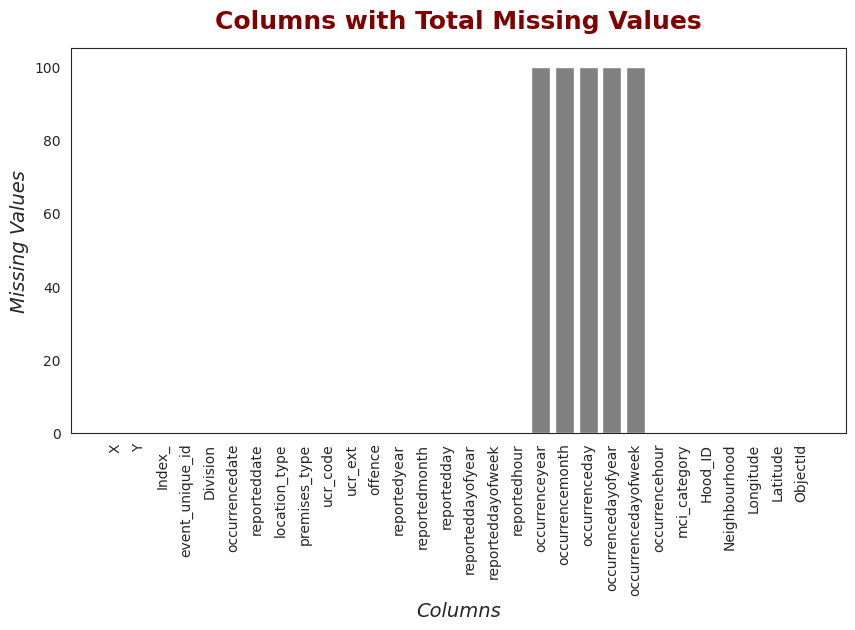

In [ ]:
#Plot the number of missing values for each column of the DataFrame df
plt.figure(figsize=(10,5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values, color = "Grey")
plt.xlabel('Columns',fontsize=14, fontstyle='italic')
plt.ylabel('Missing Values',fontsize=14, fontstyle='italic')
plt.title('Columns with Total Missing Values', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

In [ ]:
#Display the count of unique values in each columns of the Dataframe df
df.nunique()

X                       19679
Y                       19678
Index_                 301233
event_unique_id        262439
Division                   18
occurrencedate           3561
reporteddate             3103
location_type              52
premises_type               7
ucr_code                   22
ucr_ext                    16
offence                    51
reportedyear                9
reportedmonth              12
reportedday                31
reporteddayofyear         366
reporteddayofweek           7
reportedhour               24
occurrenceyear             23
occurrencemonth            12
occurrenceday              31
occurrencedayofyear       366
occurrencedayofweek         7
occurrencehour             24
mci_category                5
Hood_ID                   141
Neighbourhood             141
Longitude               19679
Latitude                19678
ObjectId               301233
dtype: int64

In [ ]:
#Display invalid records from each row of the Datafram df
invalid_records = []
for index, row in df.iterrows():
    if any(pd.isnull(row)):
        invalid_records.append(index)
    elif any(isinstance(x, str) and x.strip() == '' for x in row.values):
        invalid_records.append(index)
print('Invalid records:', invalid_records)


Invalid records: [104, 452, 1551, 1552, 3091, 3092, 4830, 5617, 5618, 5619, 5755, 5758, 9144, 9764, 9765, 9766, 13764, 21543, 25025, 25026, 26410, 26524, 27124, 27900, 30636, 32267, 33458, 35250, 38792, 40847, 41484, 43195, 46230, 46238, 47372, 47731, 53337, 58879, 61991, 68467, 76798, 79530, 89327, 89328, 91309, 100934, 123033, 128104, 134090, 138125, 147201, 149870, 153996, 154221, 157679, 158056, 159664, 161139, 163445, 163446, 166849, 166850, 166851, 166852, 166853, 166854, 166855, 166856, 172315, 172316, 172553, 174499, 175525, 177266, 177995, 178716, 178717, 199636, 210573, 219792, 219793, 222398, 238993, 239824, 240038, 240294, 245912, 247389, 252794, 258191, 259136, 268943, 270340, 275286, 281928, 284204, 294376, 294377, 299190, 299982]


In [ ]:
#Check for any duplicate values in the Dataframe df
df.duplicated().any()

False

In [ ]:
# select categorical columns
cat_cols = ['Division', 'location_type', 'premises_type',
       'offence','occurrenceyear', 'occurrencemonth', 'occurrenceday', 'occurrencedayofweek',
       'mci_category','Neighbourhood']

# calculate frequency counts
for col in cat_cols:
   print(df[col].value_counts())

D51    25784
D32    22866
D31    22057
D14    21732
D41    21484
D43    21399
D23    19231
D22    18635
D52    18330
D42    18264
D55    17676
D53    15282
D33    13027
D12    12858
D11    12078
D13    10867
D54     6344
NSA     3319
Name: Division, dtype: int64
Apartment (Rooming House, Condo)                                          72061
Single Home, House (Attach Garage, Cottage, Mobile)                       54076
Streets, Roads, Highways (Bicycle Path, Private Road)                     47619
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    34774
Parking Lots (Apt., Commercial Or Non-Commercial)                         25322
Bar / Restaurant                                                          12031
Open Areas (Lakes, Parks, Rivers)                                          6278
Schools During Supervised Activity                                         4567
Convenience Stores                                                         3851
Ttc Subway Statio

   Division  count
0       D11  12078
1       D12  12858
2       D13  10867
3       D14  21732
4       D22  18635
5       D23  19231
6       D31  22057
7       D32  22866
8       D33  13027
9       D41  21484
10      D42  18264
11      D43  21399
12      D51  25784
13      D52  18330
14      D53  15282
15      D54   6344
16      D55  17676
17      NSA   3319


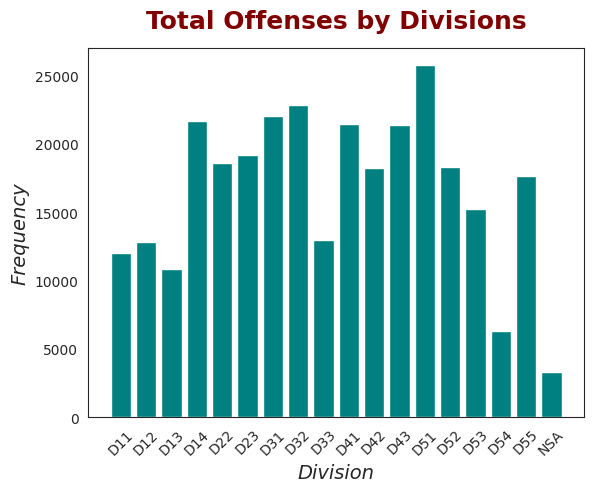

In [ ]:
#Calculate the number of occurrences of each geographic police division
df_division = df.groupby('Division').count()['X'].reset_index()
df_division = df_division.rename(columns={'X': 'count'})
print(df_division)

#Plot the count of occurrences of each division
plt.bar(df_division['Division'], df_division['count'], color = "teal")
plt.xlabel('Division',fontsize=14, fontstyle='italic')
plt.ylabel('Frequency',fontsize=14, fontstyle='italic')
plt.title('Total Offenses by Divisions', fontsize=18, fontweight='bold', y=1.03,color = '#800000')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

    occurrenceyear  count
0           2000.0     26
1           2001.0     21
2           2002.0     17
3           2003.0     15
4           2004.0     27
5           2005.0     25
6           2006.0     12
7           2007.0     34
8           2008.0     47
9           2009.0     73
10          2010.0     96
11          2011.0    130
12          2012.0    186
13          2013.0    596
14          2014.0  32467
15          2015.0  32920
16          2016.0  33608
17          2017.0  35501
18          2018.0  37440
19          2019.0  39967
20          2020.0  34973
21          2021.0  34277
22          2022.0  18675


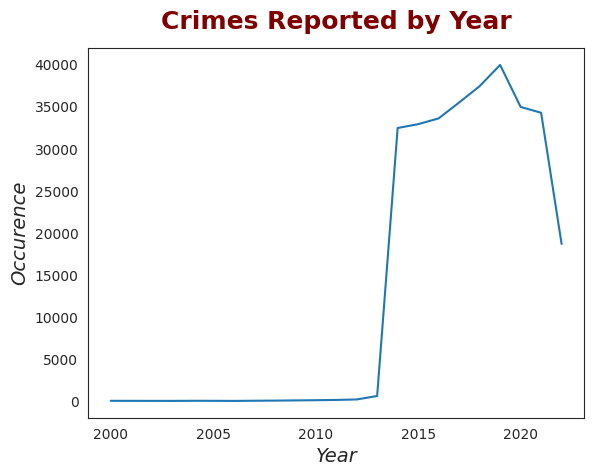

In [ ]:
#Calculate the number of occurrences in each year
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])
df['year'] = df['occurrencedate'].dt.year
df_year = df.groupby('occurrenceyear').count()['X'].reset_index()
df_year = df_year.rename(columns={'X': 'count'})
print(df_year)

#Plot the distribution of occurrences in each year
plt.plot(df_year['occurrenceyear'], df_year['count'])
plt.xlabel('Year',fontsize=14, fontstyle='italic')
plt.ylabel('Occurence',fontsize=14, fontstyle='italic')
plt.title('Crimes Reported by Year', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
plt.grid(False)
plt.show()


Assault            161833
Break and Enter     59440
Auto Theft          40794
Robbery             29230
Theft Over           9936
Name: mci_category, dtype: int64


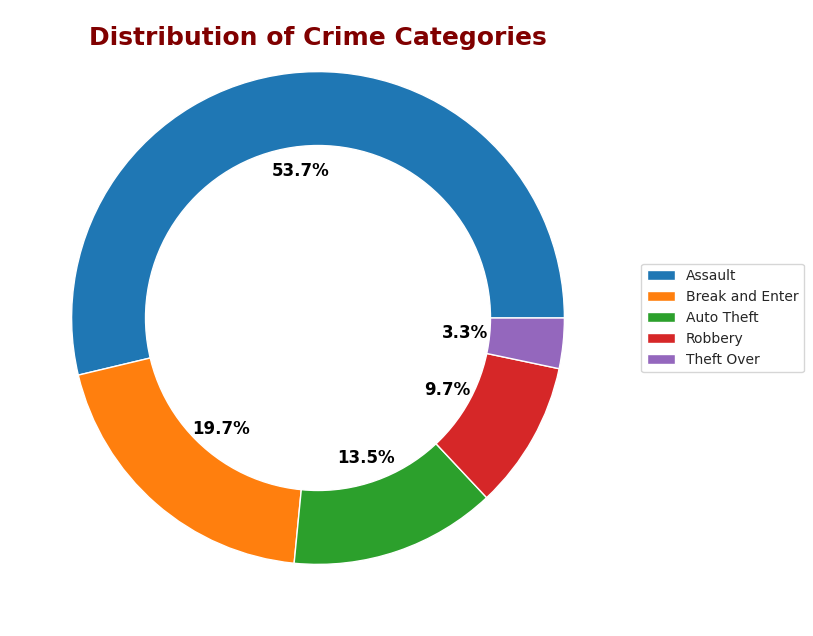

In [ ]:
# Check the different crime categories and their counts
category_counts = df['mci_category'].value_counts()
print(category_counts)

# Plot the distribution of crime categories
plt.figure(figsize=(8,8))
plt.pie(category_counts.values, autopct='%1.1f%%',textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'black'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(category_counts.index, loc='right', bbox_to_anchor=(1.3, 0.5))
plt.title('Distribution of Crime Categories',fontsize=18, fontweight='bold', y=0.93, color = '#800000')
plt.show()

mci_category    Assault  Auto Theft  Break and Enter  Robbery  Theft Over
occurrenceyear                                                           
2000.0             20.0         2.0              NaN      NaN         4.0
2001.0             19.0         1.0              1.0      NaN         NaN
2002.0             13.0         NaN              2.0      NaN         2.0
2003.0             15.0         NaN              NaN      NaN         NaN
2004.0             22.0         NaN              NaN      3.0         2.0
2005.0             24.0         NaN              NaN      NaN         1.0
2006.0             11.0         NaN              NaN      NaN         1.0
2007.0             32.0         NaN              NaN      NaN         2.0
2008.0             40.0         3.0              NaN      1.0         3.0
2009.0             64.0         1.0              1.0      NaN         7.0
2010.0             80.0         5.0              5.0      NaN         6.0
2011.0            112.0         3.0   

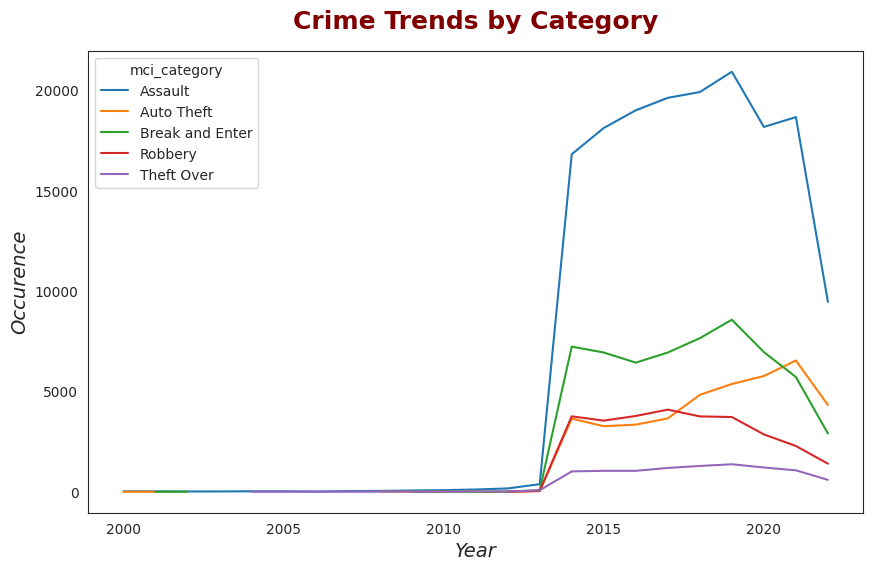

In [ ]:
#Check the different crime categories occured every year and their counts
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])
df['year'] = df['occurrencedate'].dt.year
df_year = df.groupby('occurrenceyear').count()['X'].reset_index()
df_year = df_year.rename(columns={'X': 'count'})
pv2 = pd.pivot_table(df, values='X', index='occurrenceyear', columns='mci_category', aggfunc='count')
print(pv2)

#Plot the distribution of crime categories in each year
pv2.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year',fontsize=14, fontstyle='italic')
plt.ylabel('Occurence',fontsize=14, fontstyle='italic')
plt.title('Crime Trends by Category', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
plt.grid(False)

plt.show()

                    Neighbourhood  count
0                 Agincourt North   1561
1    Agincourt South-Malvern West   2345
2                       Alderwood    835
3                           Annex   4680
4               Banbury-Don Mills   1669
..                            ...    ...
136                      Wychwood   1160
137                Yonge-Eglinton   1154
138                Yonge-St.Clair    596
139       York University Heights   5890
140            Yorkdale-Glen Park   3040

[141 rows x 2 columns]
                         Neighbourhood  count
123  Waterfront Communities-The Island  11302
23               Church-Yonge Corridor   9942
6                  Bay Street Corridor   8530
125             West Humber-Clairville   8103
79                           Moss Park   7287
139            York University Heights   5890
33                Downsview-Roding-CFB   5730
62                Kensington-Chinatown   5708
133                             Woburn   5352
84                      

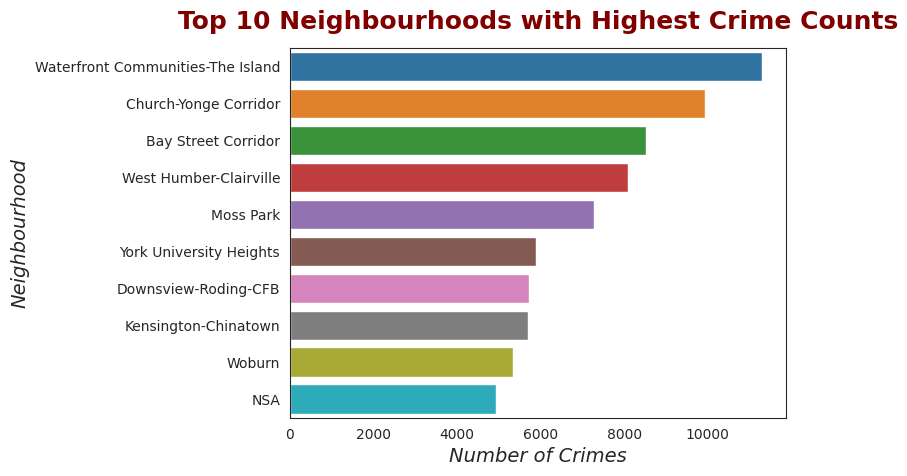

In [ ]:
#Check the count of occurrences of each neighbourhood 
df_neighbourhood = df.groupby('Neighbourhood').count()['X'].reset_index()
df_neighbourhood = df_neighbourhood.rename(columns={'X': 'count'})
print(df_neighbourhood)

#Plot the top 10 neighbourhoods with the highest crime counts
top10_neighbourhoods = df_neighbourhood.sort_values(by='count', ascending=False).head(10)
print(top10_neighbourhoods)
ax = sns.barplot(x='count', y='Neighbourhood', data=top10_neighbourhoods)
ax.set_title('Top 10 Neighbourhoods with Highest Crime Counts', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
ax.set_xlabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.set_ylabel('Neighbourhood',fontsize=14, fontstyle='italic')

plt.show()

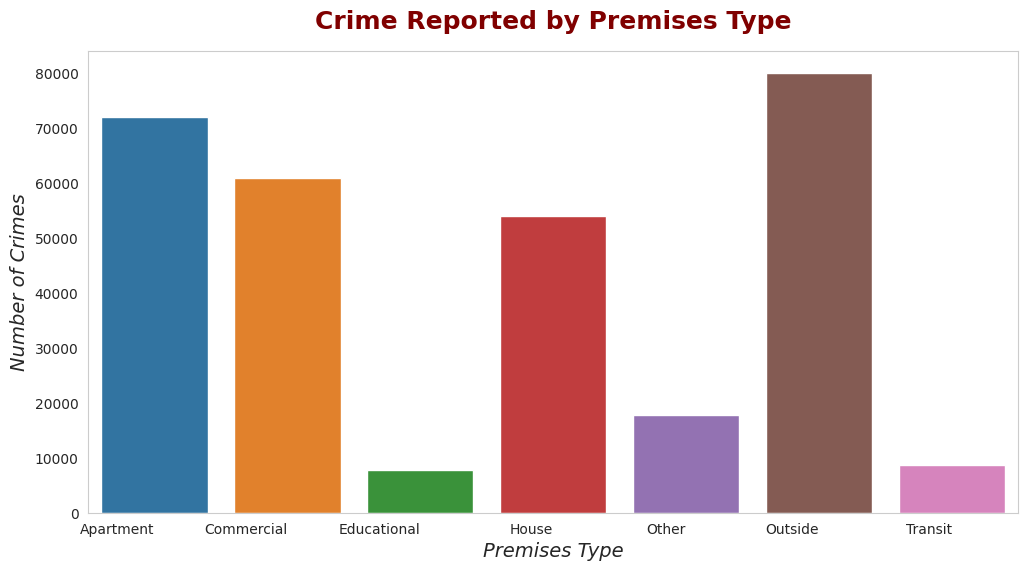

In [ ]:
# Group by premises type and count the number of crimes
df_premises = df.groupby('premises_type').count()['X'].reset_index()
df_premises = df_premises.rename(columns={'X': 'Count'})

# Plot a bar graph
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='premises_type', y='Count', data=df_premises)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')
ax.set_title('Crime Reported by Premises Type', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
ax.set_xlabel('Premises Type',fontsize=14, fontstyle='italic')
ax.set_ylabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.grid(False)
plt.show()

  occurrencedayofweek  count
0          Friday      45531
2          Saturday    44649
3          Sunday      43006
6          Wednesday   42373
4          Thursday    42364
1          Monday      41926
5          Tuesday     41284


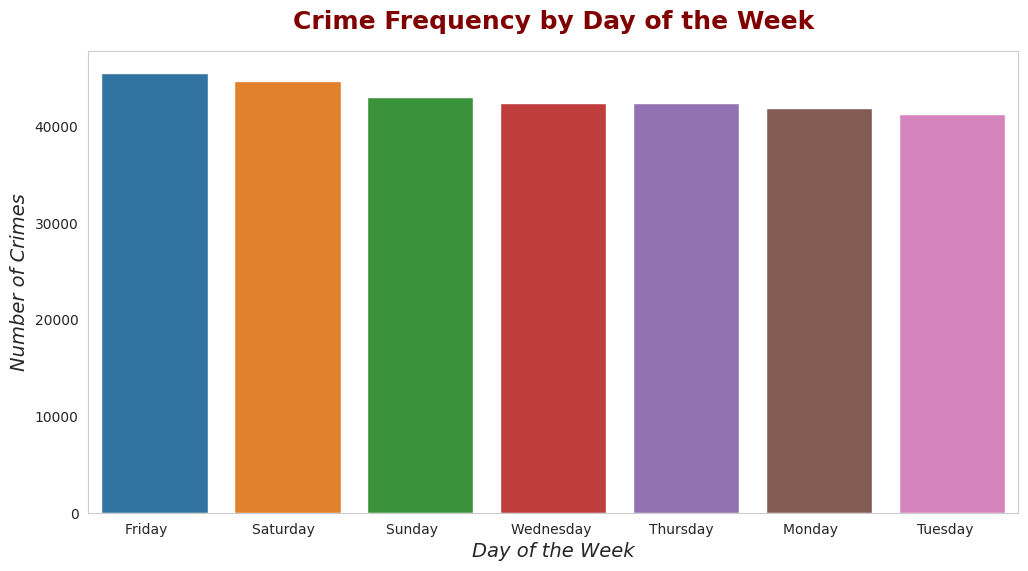

In [ ]:
#Check the count of occurrences during each day of the week
df_dayofweek = df.groupby('occurrencedayofweek').count()['X'].reset_index()
df_dayofweek = df_dayofweek.rename(columns={'X': 'count'})
df_dayofweek = df_dayofweek.sort_values(by='count', ascending=False)
print(df_dayofweek)

#Plot the count of occurrences during the week
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
ax = sns.barplot(x='occurrencedayofweek', y='count', data=df_dayofweek)
ax.set_title('Crime Frequency by Day of the Week', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
ax.set_xlabel('Day of the Week',fontsize=14, fontstyle='italic')
ax.set_ylabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.grid(False)
plt.show()

<ipython-input-307-0a68f2180636>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method='pearson')
<ipython-input-307-0a68f2180636>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr(method='pearson')


Text(0.5, 1.03, 'Correlation Matrix of Crime Data')

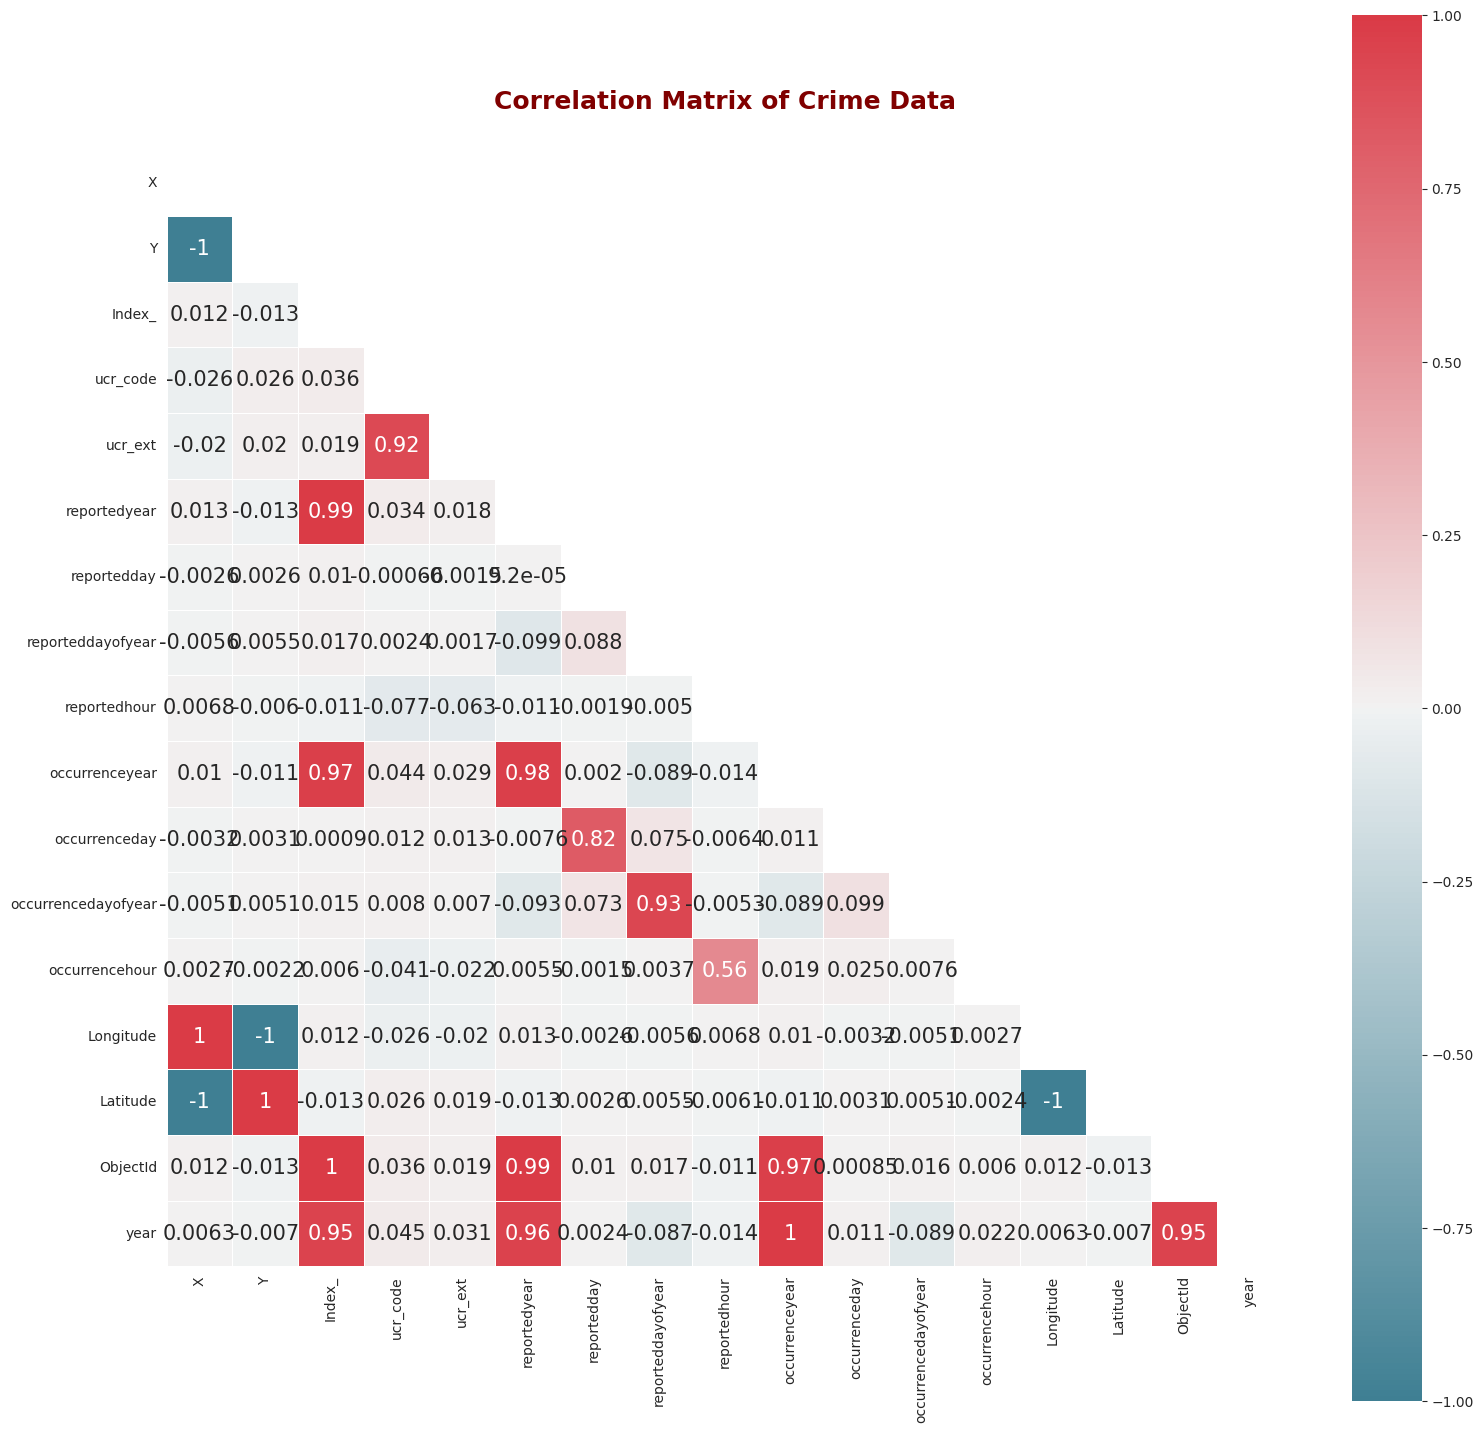

In [ ]:
#correlation matrix  using the Pearson correlation coefficient method
corrmat = df.corr(method='pearson')
sns.set_style("white")
corrmat = df.corr(method='pearson')
mask = np.zeros_like(corrmat, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Plot Heatmap of the correlation matrix 
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1}, annot=True, annot_kws={'size': 15})
plt.title('Correlation Matrix of Crime Data', fontsize=18, fontweight='bold', y=1.03, color = '#800000')

# **Data Cleaning & Transformation**

In [ ]:
#Check for missing values for each column of the DataFrame df
df.isnull().sum()

X                        0
Y                        0
Index_                   0
event_unique_id          0
Division                 0
occurrencedate           0
reporteddate             0
location_type            0
premises_type            0
ucr_code                 0
ucr_ext                  0
offence                  0
reportedyear             0
reportedmonth            0
reportedday              0
reporteddayofyear        0
reporteddayofweek        0
reportedhour             0
occurrenceyear         100
occurrencemonth        100
occurrenceday          100
occurrencedayofyear    100
occurrencedayofweek    100
occurrencehour           0
mci_category             0
Hood_ID                  0
Neighbourhood            0
Longitude                0
Latitude                 0
ObjectId                 0
year                     0
dtype: int64

In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
#Check for any duplicate values in the Dataframe df
df.duplicated().any()

False

In [ ]:
#Check for any duplicate values in the Dataframe df
df.duplicated().sum()

0

In [ ]:
df.shape

(301133, 31)

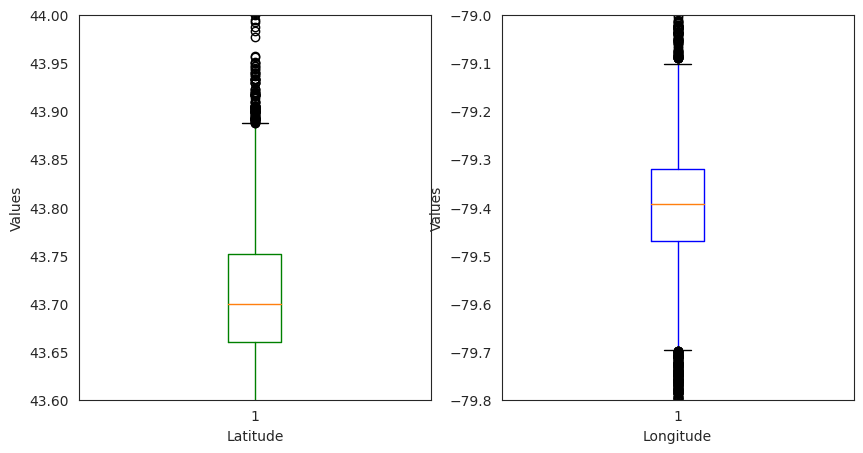

In [ ]:
# Check the outliers in the DataFrame df
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the boxplot for 'Latitude' and 'Longitude' column with blue color
bp_lat = ax[0].boxplot(df['Latitude'], boxprops=dict(color='blue'))
bp_long = ax[1].boxplot(df['Longitude'], boxprops=dict(color='red'))

# Set the y-axis limits to zoom in on the box and whiskers
ax[0].set_ylim([43.6, 44.0])
ax[1].set_ylim([-79.8, -79.0])

# Set the labels for the x- and y-axes
ax[0].set_xlabel('Latitude')
ax[1].set_xlabel('Longitude')
ax[0].set_ylabel('Values')
ax[1].set_ylabel('Values')

# Change the color of the box and whiskers to green for 'Latitude' and 'Longitude' column
for element in ['boxes', 'whiskers']:
    plt.setp(bp_lat[element], color='green')
for element in ['boxes', 'whiskers']:
    plt.setp(bp_long[element], color='blue')

# Display the plot
plt.show()


In [ ]:
# Calculate the interquartile range (IQR) for Latitude and Longitude
q1_lat = df['Latitude'].quantile(0.25)
q3_lat = df['Latitude'].quantile(0.75)
iqr_lat = q3_lat - q1_lat

q1_long = df['Longitude'].quantile(0.25)
q3_long = df['Longitude'].quantile(0.75)
iqr_long = q3_long - q1_long


In [ ]:
# Define the lower and upper bounds for outliers
lower_bound_lat = q1_lat - (1.5 * iqr_lat)
upper_bound_lat = q3_lat + (1.5 * iqr_lat)

lower_bound_long = q1_long - (1.5 * iqr_long)
upper_bound_long = q3_long + (1.5 * iqr_long)


In [ ]:
# Identify and remove outliers
lat = df[(df['Latitude'] >= lower_bound_lat) & (df['Latitude'] <= upper_bound_lat)]
lon = df[(df['Longitude'] >= lower_bound_long) & (df['Longitude'] <= upper_bound_long)]


The number of crimes recorded in the earlier year, from 2000 to 2013 is significantly lower than in the later years. This data imbalance can lead to biased results and inaccurate conclusions if not addressed appropriately. Therefore, to avoid this issue, the decision was made to remove the data from the years 2000 to 2013 and consider only the data from 2014 onwards.

# **Analysis Questions**


#1. What is the overall trend of major crimes in Toronto over the past several years? Have certain crime categories increased or decreased over time? 

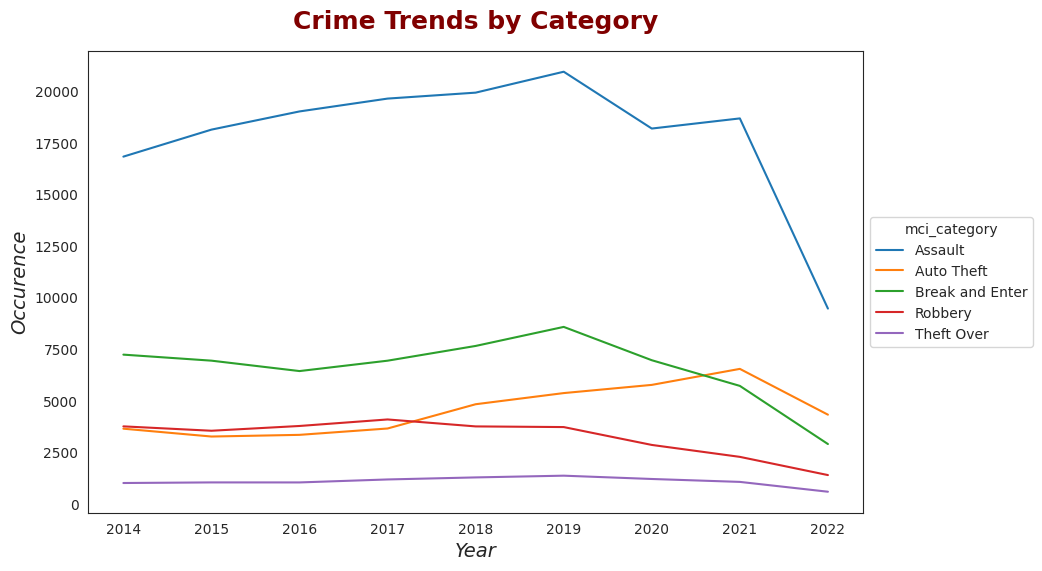

In [ ]:
#Summarizes the frequency of crimes by year and major crime indicator category
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])
df = df[df['occurrencedate'].dt.year >= 2014]
df['year'] = df['occurrencedate'].dt.year
df_year = df.groupby('occurrenceyear').count()['X'].reset_index()
df_year = df_year.rename(columns={'X': 'count'})
pv2 = pd.pivot_table(df, values='X', index='occurrenceyear', columns='mci_category', aggfunc='count')

#Plot the distribution of crime categories in each year to identify the trend
pv2.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year',fontsize=14, fontstyle='italic')
plt.ylabel('Occurence',fontsize=14, fontstyle='italic')
plt.title('Crime Trends by Category', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title='mci_category')
plt.grid(False)
plt.show()

### **Analysis:**

The plotted graph shows the trend in major crimes in Toronto from 2014 to 2022 by MCI category. It can be infered from the graph that until 2014, no crimes have been comitted or Toronto police might not have started this initiative. However, from the year 2014, crimes have been reported, mainly,  Assault, Break and Enter, Auto Theft, Robbery, and Theft Over are the top 5 most common crime categories in Toronto, consistently over the years. It is also observed that the overall number of crimes decreased from 2018 to 2022, but there was a slight increase in 2019.

The graph also shows that some crime categories have increased or decreased over time. For example, Assaults and Break and Enter cases have declined in recent years, whereas Auto theft and Robbery cases have increased. This information can be useful for policymakers and law enforcement agencies in Toronto to focus their resources and strategies on tackling these specific types of crimes.


# 2.	Are there specific areas or neighborhoods within Toronto that experience higher rates of major crimes? 

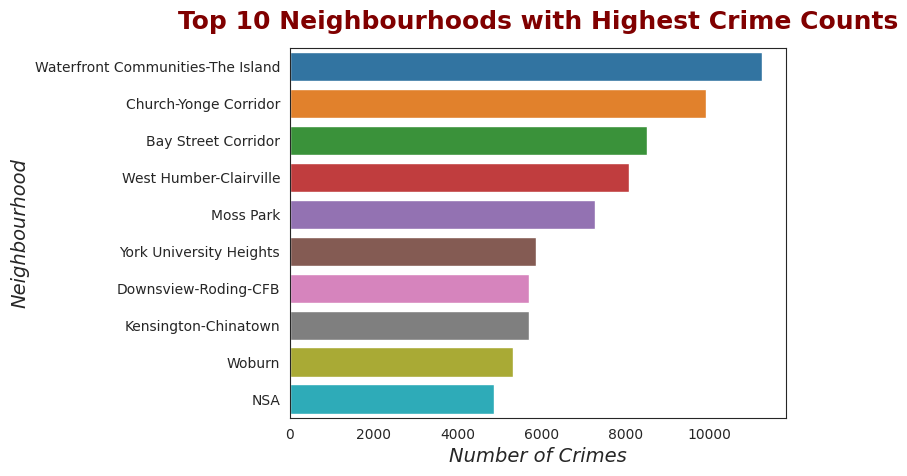

In [ ]:
#Check the count of occurrences of each neighbourhood 
df_neighbourhood = df.groupby('Neighbourhood').count()['X'].reset_index()
df_neighbourhood = df_neighbourhood.rename(columns={'X': 'count'})

#Plot the top 10 neighbourhoods with the highest crime counts
top10_neighbourhoods = df_neighbourhood.sort_values(by='count', ascending=False).head(10)
ax = sns.barplot(x='count', y='Neighbourhood', data=top10_neighbourhoods)
ax.set_title('Top 10 Neighbourhoods with Highest Crime Counts', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
ax.set_xlabel('Number of Crimes',fontsize=14, fontstyle='italic')
ax.set_ylabel('Neighbourhood',fontsize=14, fontstyle='italic')

plt.show()

### **Analysis:**

From the given count of major crimes by neighborhood, we can analyze that Waterfront Communities-The Island, Church-Yonge Corridor, and Bay Street Corridor have the highest count of major crimes. This could be because these neighborhoods are more densely populated and have more commercial and business activities, which can attract criminal activities. 

On the other hand, neighborhoods with a lower count of major crimes such as Islington-City Centre West and Woburn may have fewer commercial and business activities, and thus, lower criminal activities. However, other factors such as socio-economic factors, policing, and crime prevention measures can also influence crime rates in different neighborhoods.

# 3.	How do the characteristics of each crime category (e.g., location, time of day) vary across different areas of the city?


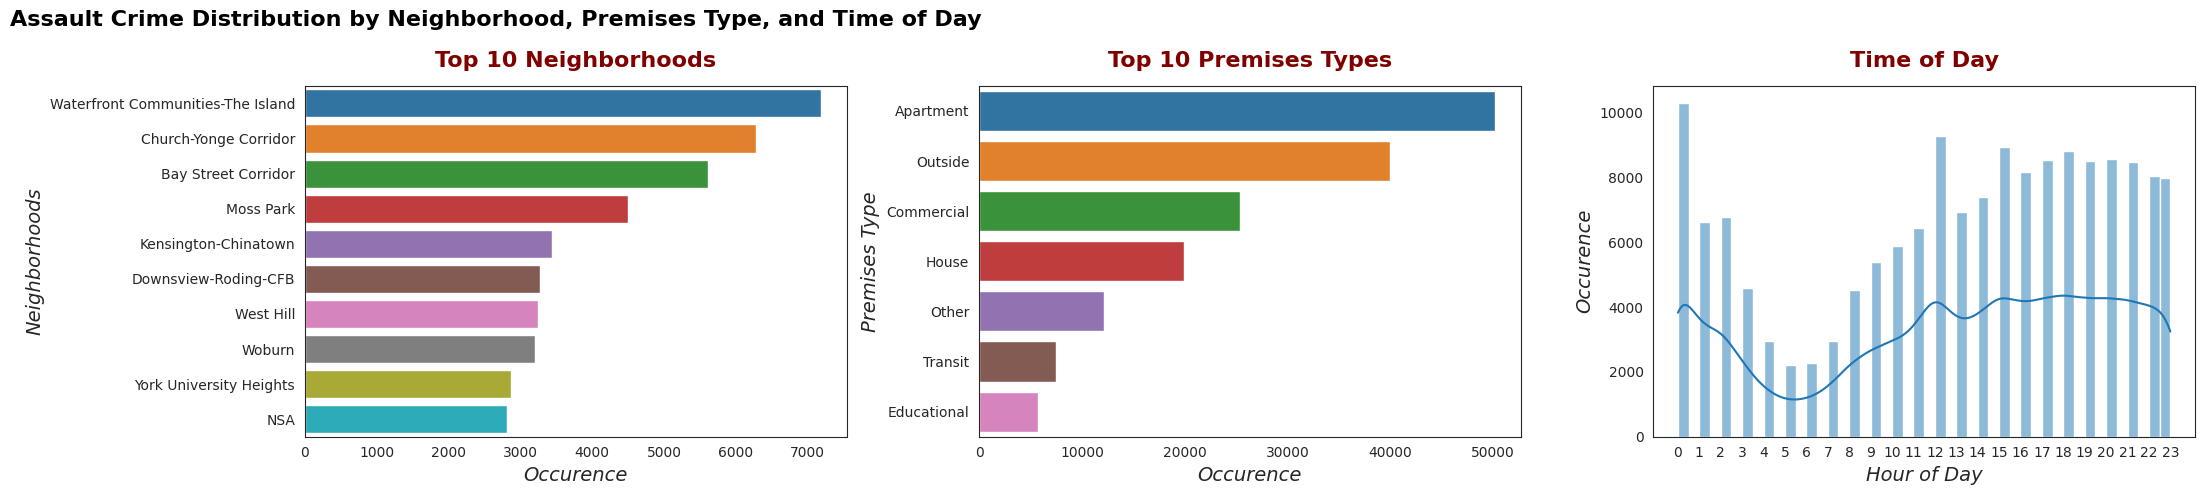

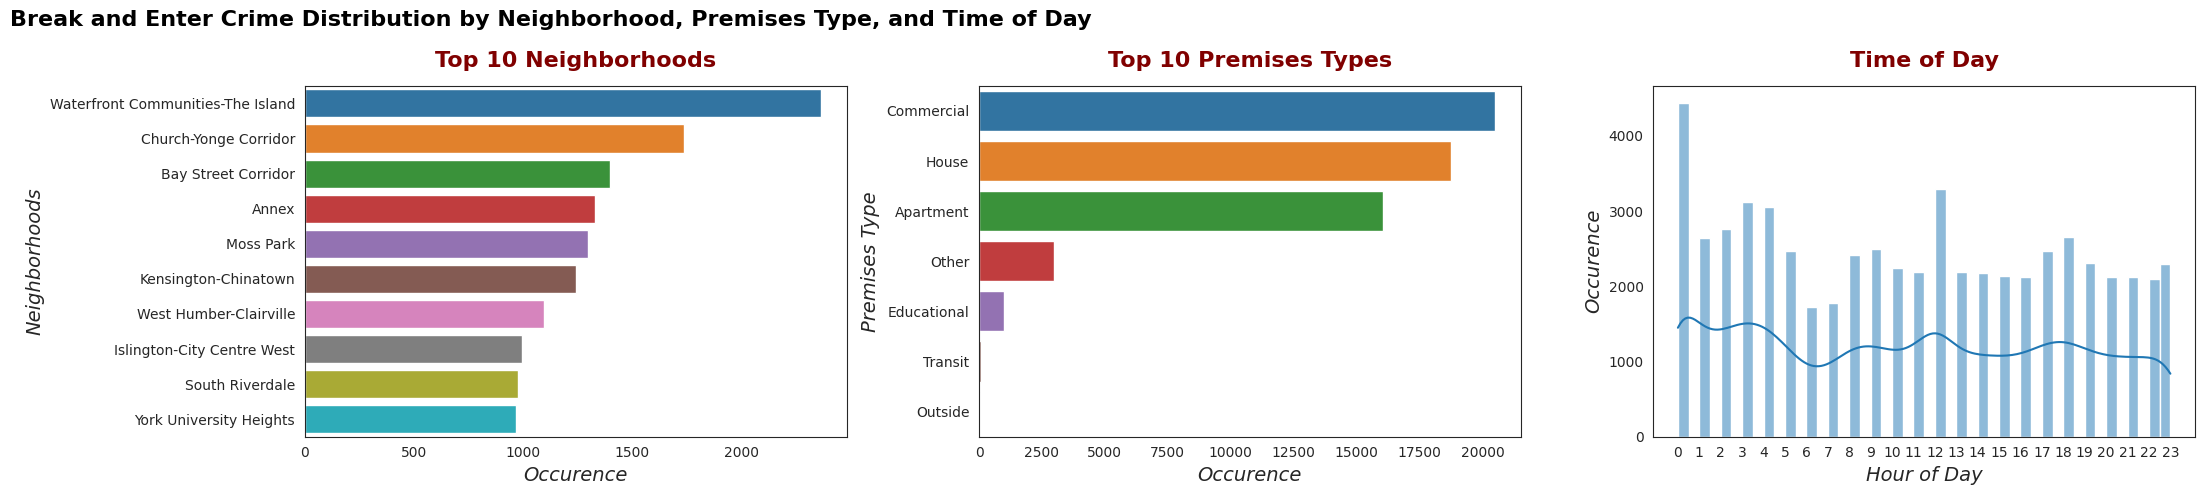

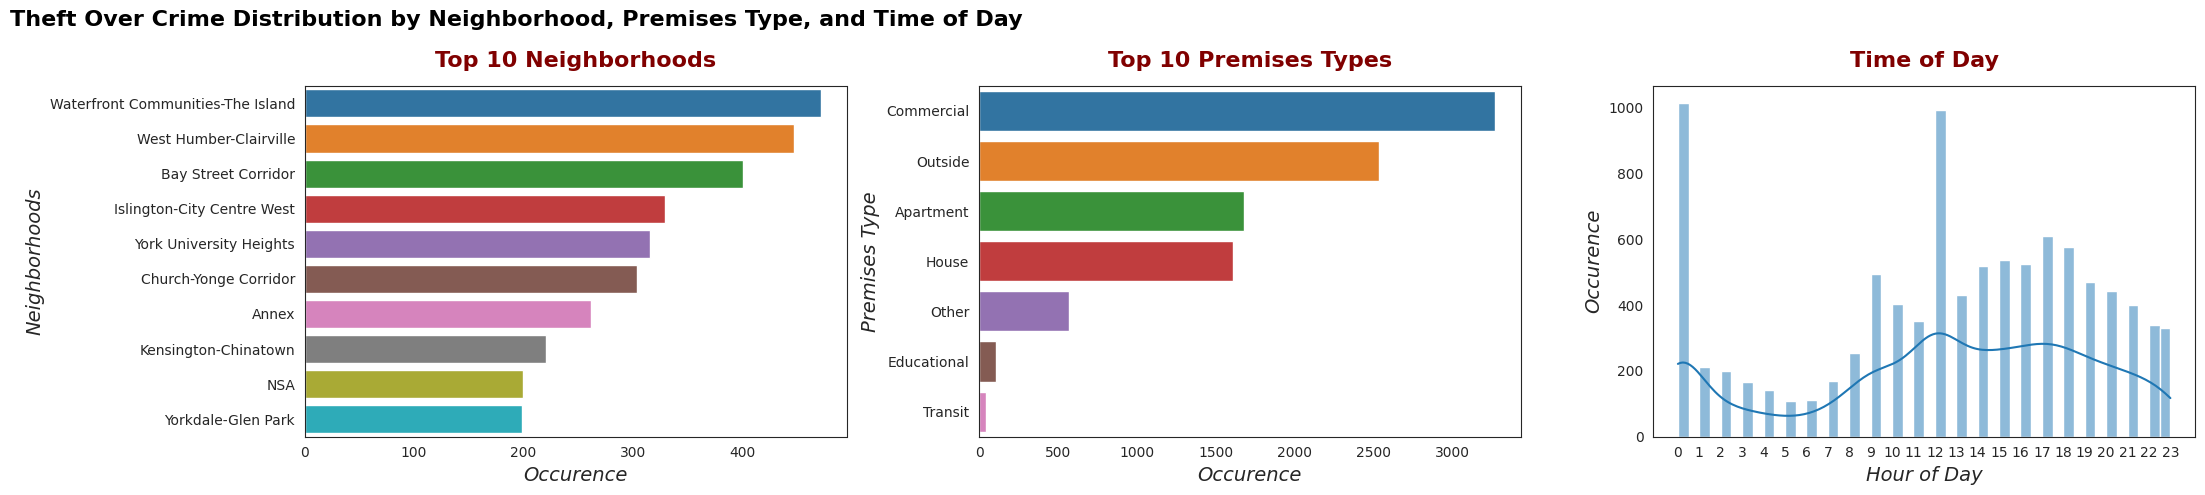

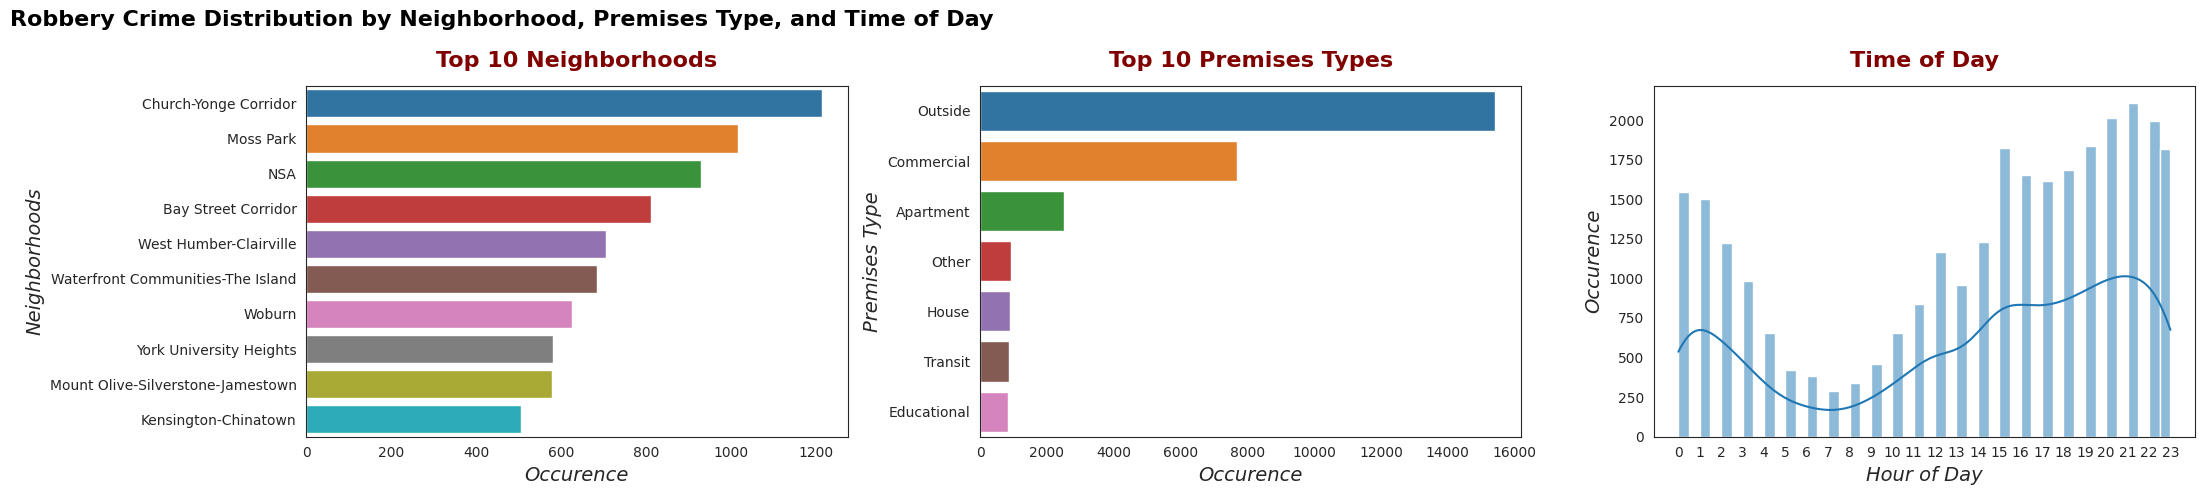

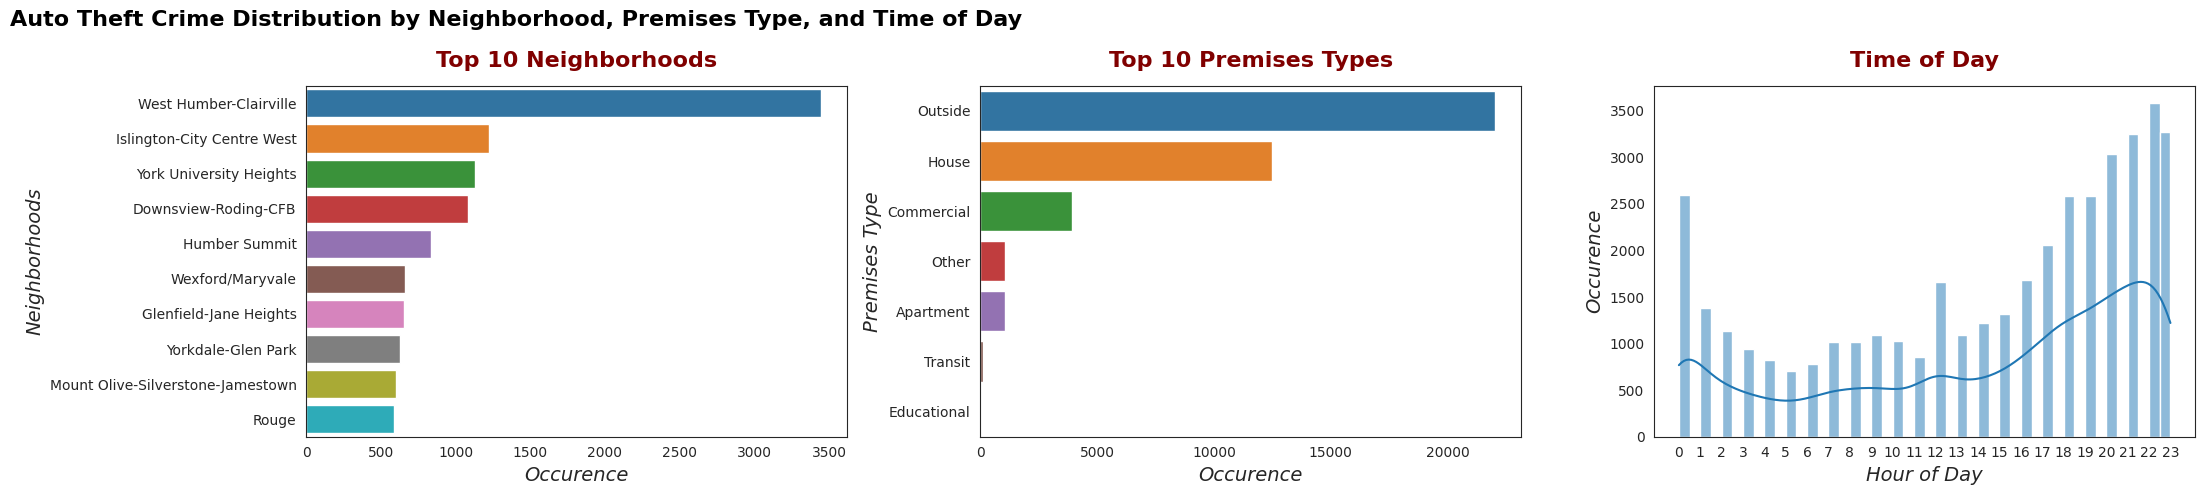

In [ ]:
# Select relevant columns
df_analysis = df[['mci_category', 'premises_type', 'Neighbourhood', 'occurrencehour']]

# Loop through each crime category
for category in df_analysis['mci_category'].unique():
    
    # Create a subplot for the current category
    plt.figure(figsize=(22,5))
    plt.suptitle(f'{category} Crime Distribution by Neighborhood, Premises Type, and Time of Day', fontsize=16, fontweight='bold', x=0, ha='left',color = 'black')
    
    # Filter the data to the current category
    df_category = df_analysis[df_analysis['mci_category'] == category]
    
    # Plot the distribution of neighborhood
    plt.subplot(131)
    sns.countplot(y='Neighbourhood', data=df_category, order=df_category['Neighbourhood'].value_counts().index[:10])
    plt.title('Top 10 Neighborhoods',fontsize=16, fontweight='bold', y=1.03, color = '#800000')
    plt.xlabel('Occurence',fontsize=14, fontstyle='italic')
    plt.ylabel('Neighborhoods',fontsize=14, fontstyle='italic')

    # Plot the distribution of premises type
    plt.subplot(132)
    sns.countplot(y='premises_type', data=df_category, order=df_category['premises_type'].value_counts().index[:10])
    plt.title('Top 10 Premises Types',fontsize=16, fontweight='bold', y=1.03, color = '#800000')
    plt.xlabel('Occurence',fontsize=14, fontstyle='italic')
    plt.ylabel('Premises Type',fontsize=14, fontstyle='italic')
    
    # Plot the distribution of time of day
    plt.subplot(133)
    sns.histplot(data=df_category, x='occurrencehour', kde=True, binwidth=0.5, linewidth=1, edgecolor='white')
    plt.title('Time of Day', fontsize=16, fontweight='bold', y=1.03, color = '#800000')
    plt.xticks(range(24))
    plt.xlabel('Hour of Day',fontsize=14, fontstyle='italic')
    plt.ylabel('Occurence',fontsize=14, fontstyle='italic')
    plt.tight_layout()
    plt.show()


### **Analysis:**

The analysis of the crime distribution by neighborhood, premises type, and time of day reveals valuable insights that can be used to enhance safety measures and prevent crime.

For each crime category, the top 10 neighborhoods with the highest crime counts are displayed in the left subplot. We can see which neighborhoods are the most affected by each type of crime and can prioritize policing and safety measures in those areas.

In the middle subplot, the top 10 premises types where the crime occurred are shown. This information can help identify the types of locations that need more attention to prevent crime.

In the right subplot, the distribution of crime occurrence by the hour of the day is displayed. By analyzing this distribution, we can see which hours of the day are more susceptible to crime and can adjust safety measures accordingly. For example, if we observe that most of the crime occurs during late night hours, we can allocate more police force and surveillance cameras during those hours.


# 4.	Are there any seasonal patterns in major crime rates?

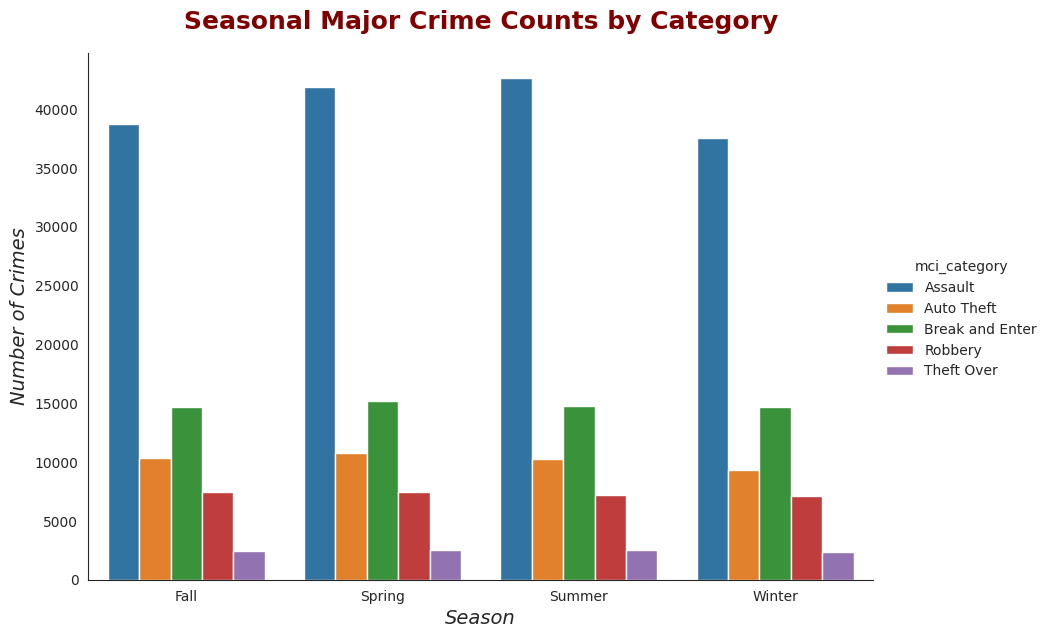

In [ ]:
# convert the occurrencedate column to datetime format
df['occurrencedate'] = pd.to_datetime(df['occurrencedate'])

# create a new column for season based on the month of occurrence
df['season'] = df['occurrencedate'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                                   else 'Spring' if x in [3, 4, 5]
                                                   else 'Summer' if x in [6, 7, 8]
                                                   else 'Fall')

# group by season and mci_category and frequency of crimes
seasonal_counts = df.groupby(['season', 'mci_category'])['event_unique_id'].count().reset_index()

# plot the seasonal crime counts by mci_category
sns.catplot(x='season', y='event_unique_id', hue='mci_category', data=seasonal_counts, kind='bar', height=6, aspect=1.5)
plt.title('Seasonal Major Crime Counts by Category', fontsize=18, fontweight='bold', y=1.03, color = '#800000')
plt.xlabel('Season', fontsize=14, fontstyle='italic')
plt.ylabel('Number of Crimes', fontsize=14, fontstyle='italic')
plt.show()

### **Analysis:**

From the plot, we can see that there is a clear seasonal pattern in major crime rates in Toronto, with higher crime counts in the summer months (June to August) and lower crime counts in the winter months (December to February). This is a common pattern in many cities and is likely due to a combination of factors such as increased outdoor activity and tourism in the summer months, and colder weather and shorter daylight hours in the winter months.

The graph also shows that Assault has the highest number of incidents across all seasons, followed by Break and Enter and Auto Theft. The number of Robbery and  Theft Over incidents are relatively consistent across all seasons.


In [ ]:
# Check the correlations between different crime categories

#Create a contingency table for mci_category and occurrenceyear
contingency_table = pd.crosstab(df['mci_category'], df['occurrenceyear'])

# Calculate Cramer's V statistic
cramers_v = rp.crosstab(df['mci_category'], df['occurrenceyear']).apply(lambda x: x / x.sum(), axis=1).apply(lambda x: x / x.sum(), axis=0)
cramers_v = np.sqrt(cramers_v.sum().sum() / min(contingency_table.shape[0]-1, contingency_table.shape[1]-1))

# Print the results
print(f"Cramer's V: {cramers_v:.2f}")

Cramer's V: 1.58


### **It is not possible to have a Cramer's V value of 1.58 as the range of the statistic is between 0 and 1. Cramer's V is a measure of association between categorical variables and it ranges from 0 (no association) to 1 (perfect association). Therefore, we need to change the analytic question #5 in order to have accurate analysis and derive appropriate conclusion.**

#5. What are the top 5 offenses in each of the top 5 divisions with the highest overall offense counts, and how do they compare to each other in terms of frequency?

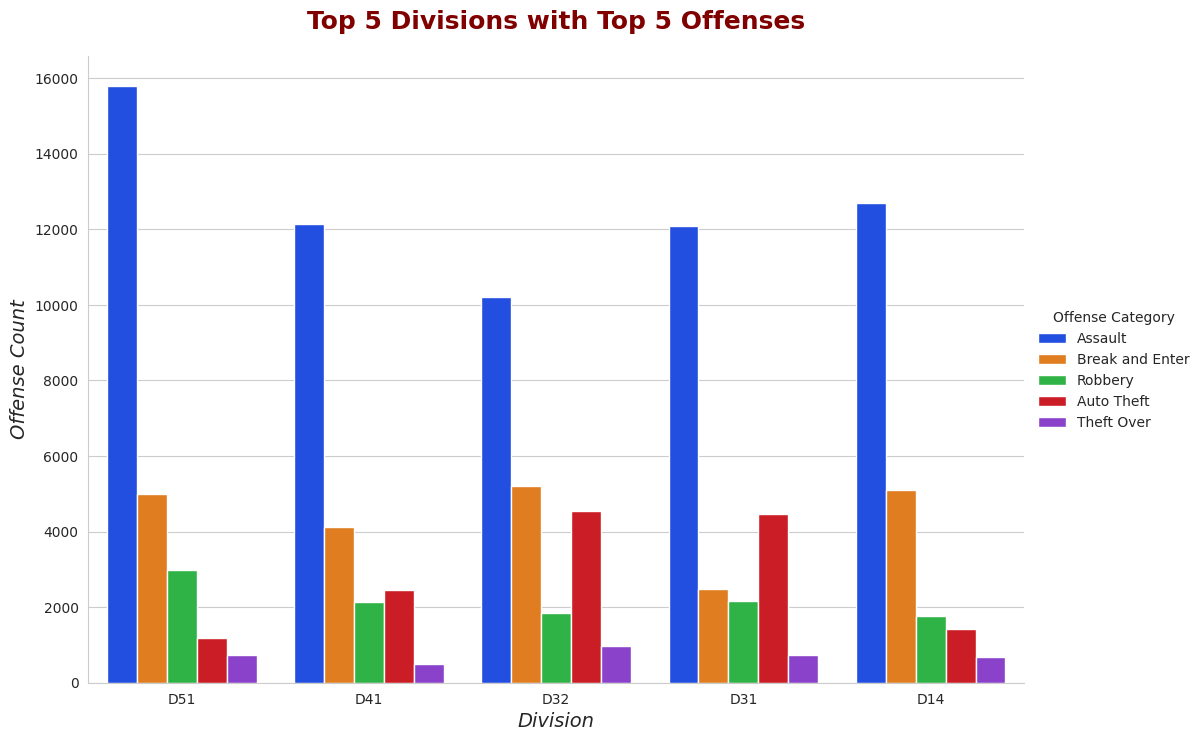

In [ ]:
# Create a dataframe with the top 5 offenses for each of the top 5 divisions
df_top_offenses = pd.DataFrame(top_5_offenses_by_division).T.reset_index()
df_top_offenses = df_top_offenses.melt(id_vars=['index'], var_name='Offense Category', value_name='Offense Count')
df_top_offenses = df_top_offenses.sort_values(['index', 'Offense Count'], ascending= False)
df_top_offenses = df_top_offenses.groupby('index').head(5)


# Plot a grouped bar chart using seaborn
sns.set_style('whitegrid')
sns.catplot(data=df_top_offenses, x='index', y='Offense Count', hue='Offense Category', kind='bar', palette='bright', height=7, aspect=1.5)

# Set the plot title and axis labels
plt.title('Top 5 Divisions with Top 5 Offenses', fontsize=18, fontweight='bold', y=1.03, color='#800000')
plt.xlabel('Division', fontsize=14, fontstyle='italic')
plt.ylabel('Offense Count', fontsize=14, fontstyle='italic')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

plt.show()


### **Analysis:**

The plot illustrates that Assault is the most common offense across all top 5 divisions, with Break and Enter following closely behind. Division D32 and D31 have the highest number of Auto Theft incidents, while Robbery and Theft Over incidents are relatively consistent across all top 5 divisions, except for a slight increase in Robbery incidents in D51. When considering all 5 divisions and their respective offense counts, D51 emerges as having the highest counts for 3 of the most frequent offenses

# **Conclusions and Limitations**

The analysis of the Toronto MCI dataset has revealed several key insights and findings:

*   Firstly, we observed a decrease in the overall number of crimes in Toronto over the past few years, with a slight increase in 2019. 

*   The top five most common crime categories remained consistent over the years, with Assault, Break and Enter, Auto Theft, Robbery, and Theft Over being the most prevalent. 

*   We also found that certain neighborhoods, including Waterfront Communities-The Island, Church-Yonge Corridor, and Bay Street Corridor, had higher counts of major crimes. 
*   Additionally, our analysis revealed a seasonal pattern in major crime rates, with higher crime counts in the summer months and lower crime counts in the winter months. 

*  Analysis also highlights that Assault and Break and Enter are the major concerns in all of the top 5 divisions with high overall offense counts. Auto Theft stands out as a significant issue in D32 and D31, while Robbery and Theft Over incidents show a relatively consistent frequency across all divisions.

* It is important to note that the lack of available demographic information, such as age, gender, and socioeconomic status, is a limitation of the dataset. Obtaining such information could provide valuable insights into the patterns and trends of crime














# **Recommendations**



*   Based on the analysis and insights, an effective system for identifying and analyzing crime patterns in Toronto can be developed by integrating a wide range of data sources, including crime reports, demographic information, and environmental factors. Such a system could provide a more accurate and comprehensive understanding of crime patterns and trends in the city.

*  The system could use advanced analytics and machine learning techniques to analyze and visualize crime data in real-time, which could help to identify emerging crime patterns and trends and can inform law enforcement agencies' decisions on where to allocate resources and how to develop strategies to prevent and reduce crime.


*  It could also incorporate data on demographic characteristics, such as age, gender, and socioeconomic status, to help identify areas of the city that are most at risk of crime.


*  As the Assault and Break and Enter are the major concerns in all of the top 5 divisions with high overall offense counts, increasing police patrols in these high-risk areas and improving surveillance systems would be useful to investigate the reasons behind the relatively consistent frequency of Assault and Break and Enter 

*  Additionally, environmental factors, such as lighting, foot traffic, and real-time data streams, such as CCTV cameras, social media, and other sources could be integrated into the system to identify areas that are more vulnerable to crime which helps to provide up-to-date and accurate information on crime patterns and trends.

*   Initiatives to promote public safety and awareness within the communities should be incorpated in by fostering community engagement and collaboration, promoting education and awareness, address underlying social and economic issues, using data-driven approaches and promoting diversity and inclusion



# **References**

1. Data Science Earth [@ferhatmetin] (2021, January 13). Map Visualization with Folium 

https://medium.com/datasciencearth/map-visualization-with-folium-d1403771717 

 

2. plotly|Graphing Libraries. Dashboard API in Python/v3 [Online Dashboard] 

https://plotly.com/python/v3/create-online-dashboard-legacy/

 

3. Statology [@ZACH] (2020, December 16). How to Calculate Cramer’s V in Python 

https://www.statology.org/cramers-v-in-python/

 

4. Towards Data Science [@Ashwani Dhankhar] (2019, January 19). Mapping with Matplotlib, Pandas, Geopandas and Basemap in Python. 

https://towardsdatascience.com/mapping-with-matplotlib-pandas-geopandas-and-basemap-in-python-d11b57ab5dac

 

5. Tommaso, I. (2023). Including a librarian in the online classroom [PowerPoint slides]. Blackboard. 

Content (stclaircollege.ca)  [https://lms.stclaircollege.ca/ultra/courses/_55847_1/cl/outline] 

 

6. DataCamp Learn Website 

https://app.datacamp.com/learn/

 

 